In [254]:
import numpy as np
import pandas as pd

In [255]:
##Importação dos dados de treino

In [256]:
fd001_train = pd.read_csv("train_FD001.txt",
                    sep='\s+',
                    header= None)  

fd001_test = pd.read_csv("test_FD001.txt",
                    sep='\s+',
                    header= None) 

rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None) 

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:9: SyntaxWarning: invalid escape sequence '\s'
  rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None)


In [257]:
##Remoção de colunas inteiramente preenchidas por NaN

In [258]:
fd001_train = fd001_train.dropna(axis=1,how='all')
fd001_test = fd001_test.dropna(axis=1,how='all')

In [259]:
##Introdução do cabeçalho do data frame

In [260]:
cabecalho1 = ["ID","Nº Ciclos","Altitude [ft]", "Mach","TRA", "T2 [°R]", "T24 [°R]", "T30 [°R]", 
             "T50[°R]", "P2 [psia]", "P15 [psia]", "P30 [psia]", "Nf [rpm]", "Nc [rpm]", "epr [-]",
             "Ps30 [psia]", "phi [pps/psi]", "NRf [rpm]", "NRc [rpm]", "BPR [-]", "farB [-]",
             "htBleed [-]", "Nf_dmd [rpm]", "PCNfR_dmd [rpm]", "W31 [lbm/s]", "W32 [lbm/s]"] 
fd001_train.columns = cabecalho1 
fd001_test.columns = cabecalho1  
cabecalho2 = ["rul"]
rul001.columns = cabecalho2

print(fd001_train.head())

   ID  Nº Ciclos  Altitude [ft]    Mach    TRA  T2 [°R]  T24 [°R]  T30 [°R]  \
0   1          1        -0.0007 -0.0004  100.0   518.67    641.82   1589.70   
1   1          2         0.0019 -0.0003  100.0   518.67    642.15   1591.82   
2   1          3        -0.0043  0.0003  100.0   518.67    642.35   1587.99   
3   1          4         0.0007  0.0000  100.0   518.67    642.35   1582.79   
4   1          5        -0.0019 -0.0002  100.0   518.67    642.37   1582.85   

   T50[°R]  P2 [psia]  ...  phi [pps/psi]  NRf [rpm]  NRc [rpm]  BPR [-]  \
0  1400.60      14.62  ...         521.66    2388.02    8138.62   8.4195   
1  1403.14      14.62  ...         522.28    2388.07    8131.49   8.4318   
2  1404.20      14.62  ...         522.42    2388.03    8133.23   8.4178   
3  1401.87      14.62  ...         522.86    2388.08    8133.83   8.3682   
4  1406.22      14.62  ...         522.19    2388.04    8133.80   8.4294   

   farB [-]  htBleed [-]  Nf_dmd [rpm]  PCNfR_dmd [rpm]  W31 [lbm/s]

In [261]:
##Geração de Histogramas e seleção de variáveis

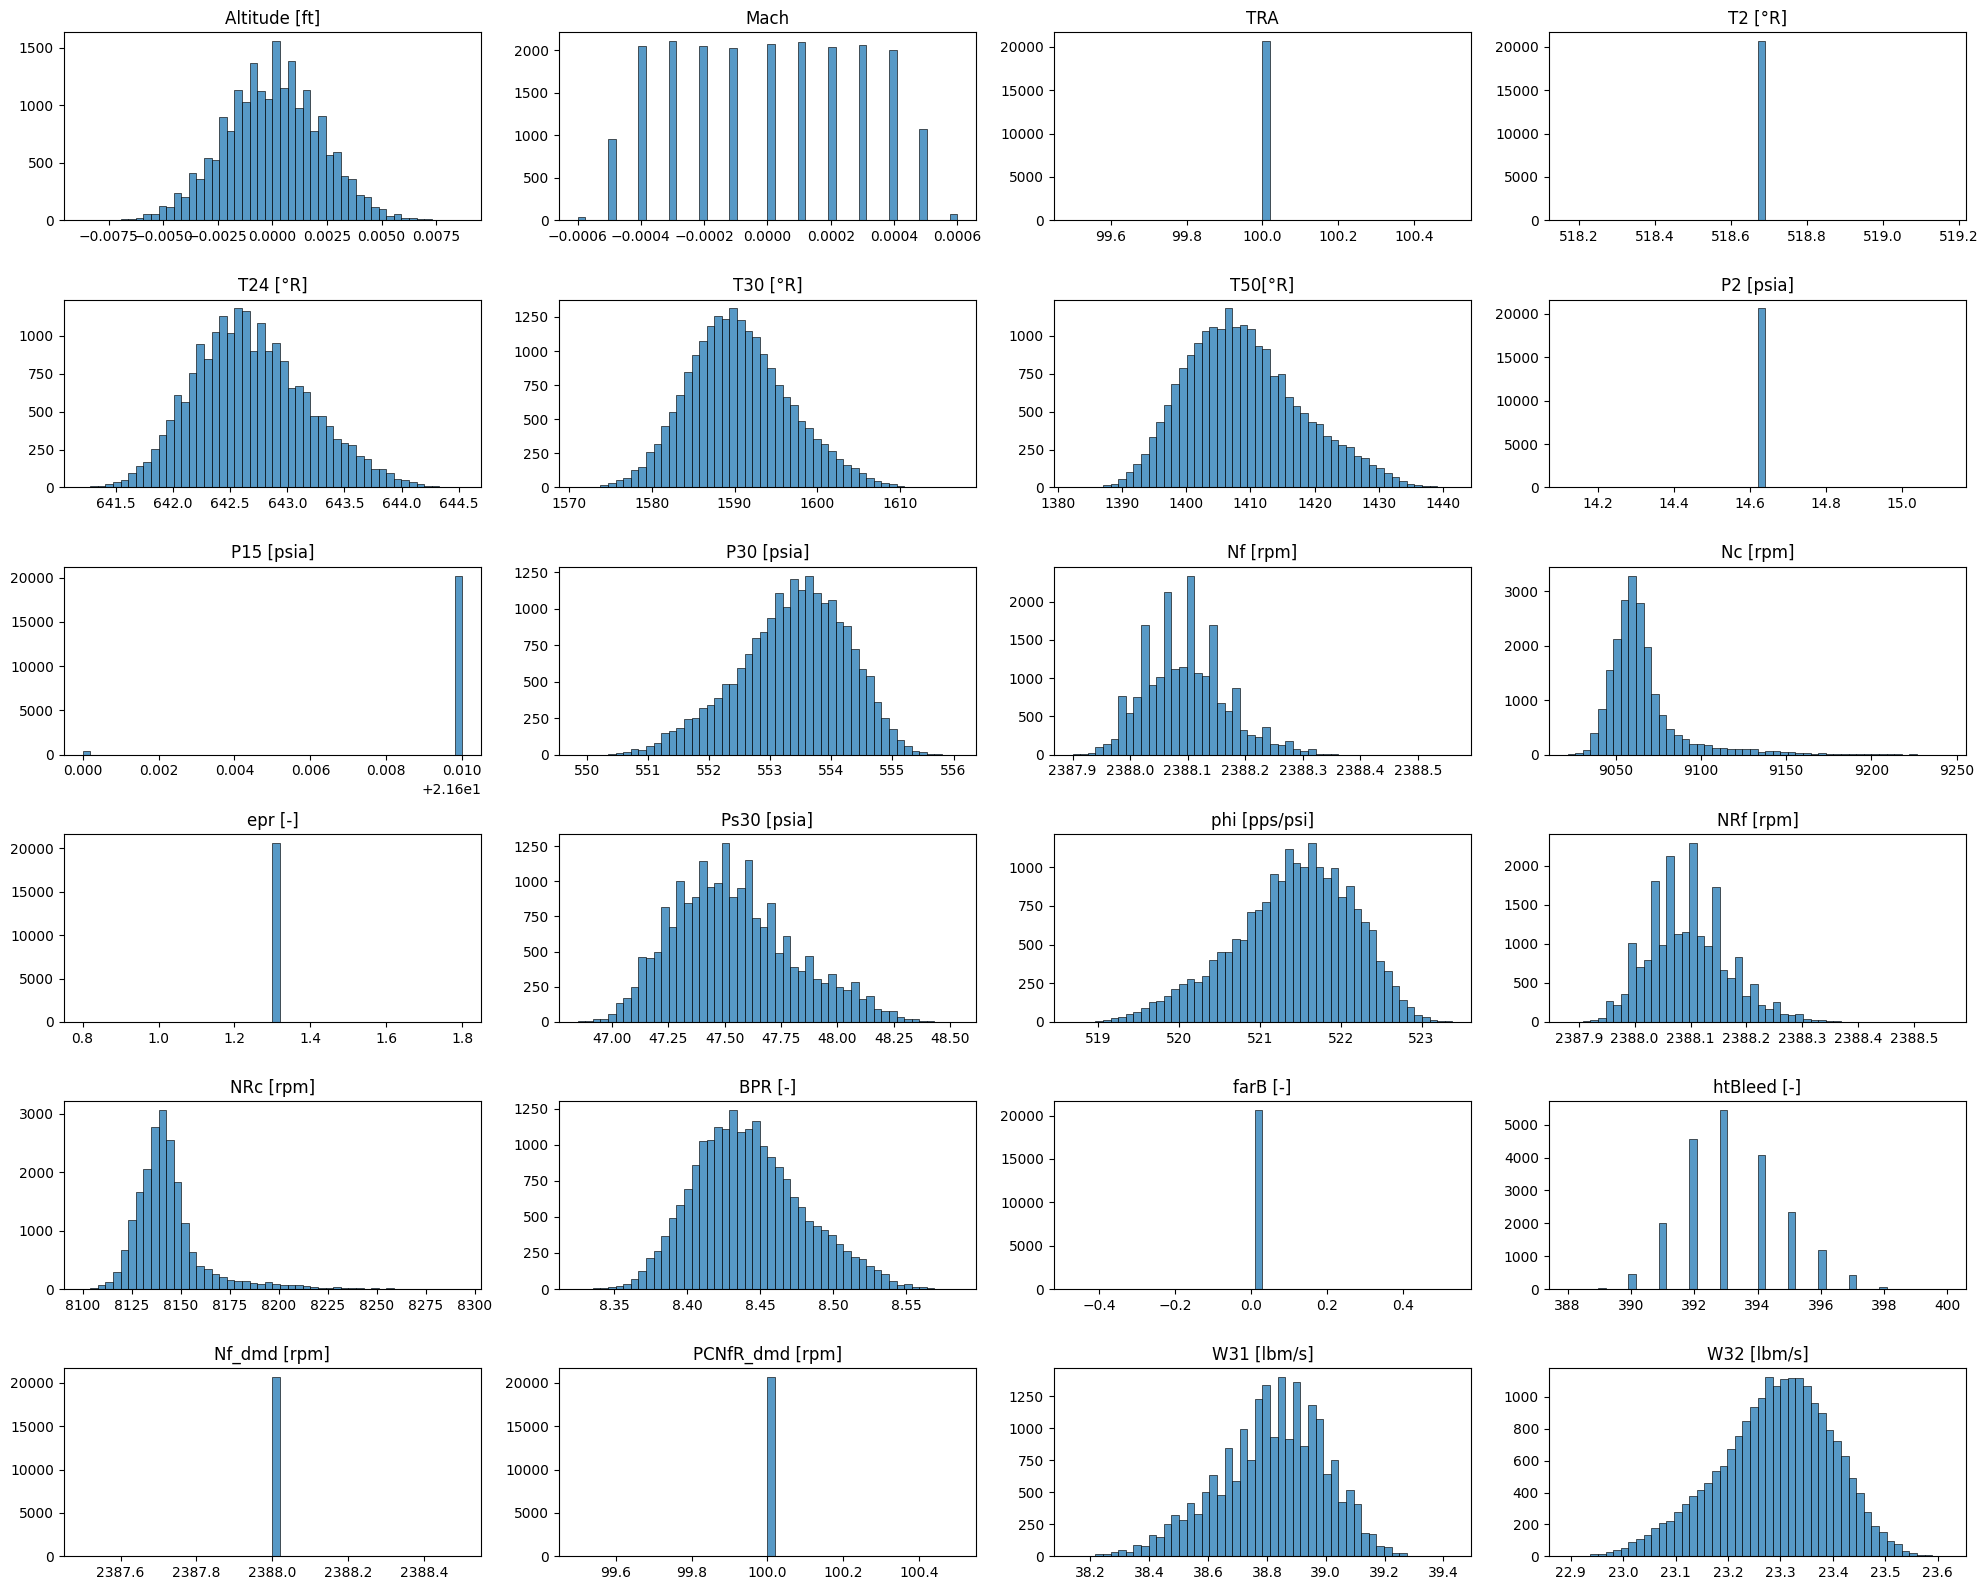

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(20,16))
axes=axes.ravel()
for i,item in enumerate(fd001_train.columns[2:]):
    sns.histplot(fd001_train[item],bins=50,ax=axes[i])
    axes[i].set_title(f'{item}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('') 

plt.tight_layout()
plt.show()

In [263]:
features_train =fd001_train.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]', 'PCNfR_dmd [rpm]'])

features_test =fd001_test.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]','PCNfR_dmd [rpm]']) 

In [264]:
##Normalização

In [265]:
from sklearn.preprocessing import MinMaxScaler

In [266]:
features=features_train.columns[2:]
scaler = MinMaxScaler()
features_train[features] = scaler.fit_transform(features_train[features])
features_test[features]=scaler.transform(features_test[features]) 

In [267]:
##Definição dos targets para regressão e classificação nos dados de treino

In [268]:
limit = 130 
max_ciclos = fd001_train.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_train = []
for m in fd001_train['ID'].unique():
    motor = fd001_train[fd001_train['ID']==m]
    aux=[]
    for k in range(len(motor['Nº Ciclos'])):
        if k+1 <= max_ciclos['Nº Ciclos'].iloc[m-1]-limit:
            aux.append(limit)
        else:
            aux.append(max_ciclos['Nº Ciclos'].iloc[m-1]-
                       motor['Nº Ciclos'].iloc[k]) 
    rul_train.extend(aux) 
rul_train = [int(x) for x in rul_train]

In [269]:
##Visualização de um ciclo de vida de um motor

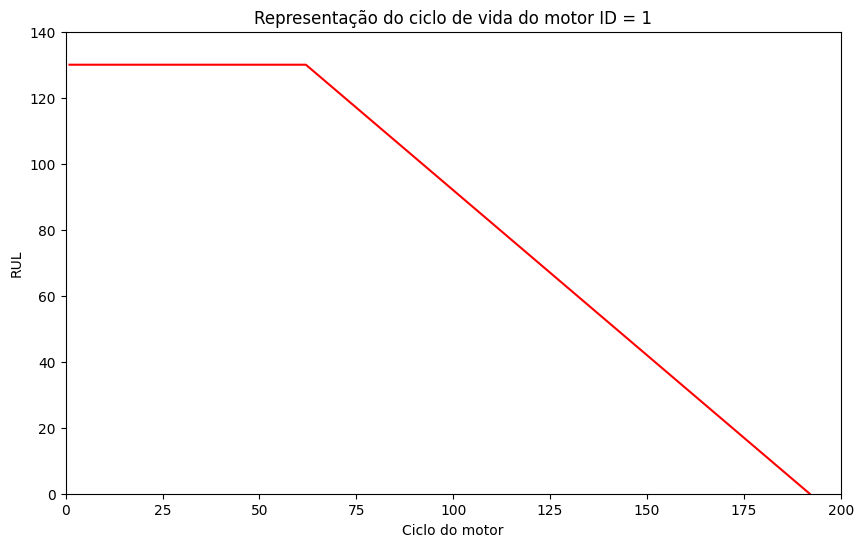

In [270]:
exemplo = fd001_train[fd001_train['ID']==1]
l=len(exemplo['Nº Ciclos'])

plt.figure(figsize=(10,6))

plt.plot(exemplo['Nº Ciclos'].iloc[0:l],rul_train[0:l],c='red')
plt.title('Representação do ciclo de vida do motor ID = 1')
plt.ylim(0,140)
plt.xlim(0,200)
plt.xlabel('Ciclo do motor')
plt.ylabel('RUL')
plt.show()

In [271]:
##Definição dos targets para regressão e classificação nos dados de teste 

In [272]:
max_ciclos_test = fd001_test.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_test = []
for m in fd001_test['ID'].unique():
    engine = fd001_test[fd001_test['ID']==m]
    for k in range(len(engine['Nº Ciclos'])):
        rul_aux=(max_ciclos_test['Nº Ciclos'].iloc[m-1]-
                 engine['Nº Ciclos'].iloc[k])
        v = rul_aux+rul001['rul'].iloc[m-1]
        if v >= limit:
            rul_test.append(limit)
        else:
            rul_test.append(v)
rul_test = [int(x) for x in rul_test]

In [273]:
##Criação das janelas de tempo para dados de treino e de teste

In [274]:
def time_window(data,rul,window_size,step):
    x,y = [], []
    l=0
    for m in data['ID'].unique():
        engine = data[data['ID']==m]
        for i in range(0,len(engine)-window_size+1,step):
            f= i + window_size
            x.append(engine.iloc[i:f,2:].values)
            y.append(rul[l+f-1]) 
        l += len(engine)
    return np.array(x), np.array(y)
window_size = 30
step = 1
x_train, y_train= time_window(features_train,rul_train,window_size,step)

print(x_train.shape,y_train.shape)  

x_test, y_test= time_window(features_test,rul_test,window_size,step)
print(x_test.shape,y_test.shape)

(17731, 30, 17) (17731,)
(10196, 30, 17) (10196,)


In [275]:
##Separação das variáveis de treino e teste

In [276]:
from sklearn.model_selection import train_test_split

x1,x2,y1,y2 = train_test_split(x_train,y_train,test_size=0.2,random_state=1)

x1=x1.astype('float32')
x2=x2.astype('float32')
y1=y1.astype('float32')
y2=y2.astype('float32')

In [277]:
##Criação do modelo LSTM

In [278]:
from tensorflow import keras 
from keras import layers
from keras.models import Sequential
from keras.metrics import AUC
from keras.layers import LSTM,Dense,Dropout,Bidirectional
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf 
import keras_tuner
import time  

shape = (x1.shape[1], x1.shape[2])

model_lstm=Sequential()
model_lstm.add(LSTM(64,activation='tanh',
                return_sequences=True,input_shape=shape))
model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(256,activation='tanh'))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(32,activation='relu'))
model_lstm.add(Dense(1,activation='linear'))

model_lstm.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [279]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 3592.9404 - mean_absolute_error: 49.1013 - mean_squared_error: 3592.9399

71/71 ━━━━━━━━━━━━━━━━━━━━ 25s 273ms/step - loss: 2090.1558 - mean_absolute_error: 37.1582 - mean_squared_error: 2090.1558 - val_loss: 899.5472 - val_mean_absolute_error: 24.3681 - val_mean_squared_error: 899.5472
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - loss: 909.1080 - mean_absolute_error: 24.3704 - mean_squared_error: 909.1080

71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 254ms/step - loss: 849.9041 - mean_absolute_error: 23.3568 - mean_squared_error: 849.9041 - val_loss: 527.9103 - val_mean_absolute_error: 19.0732 - val_mean_squared_error: 527.9103
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 692.5432 - mean_absolute_error: 20.5770 - mean_squared_error: 692.5432

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 197ms/step - loss: 677.2181 - mean_absolute_error: 20.3531 - mean_squared_error: 677.2181 - val_loss: 388.8775 - val_mean_absolute_error: 16.2959 - val_mean_squared_error: 388.8775
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 531.0883 - mean_absolute_error: 18.0434 - mean_squared_error: 531.0883

71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 206ms/step - loss: 521.4254 - mean_absolute_error: 17.8180 - mean_squared_error: 521.4254 - val_loss: 355.4177 - val_mean_absolute_error: 14.0751 - val_mean_squared_error: 355.4177
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 438.3619 - mean_absolute_error: 16.1855 - mean_squared_error: 438.3619

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - loss: 439.5014 - mean_absolute_error: 16.1856 - mean_squared_error: 439.5014 - val_loss: 382.2458 - val_mean_absolute_error: 14.6185 - val_mean_squared_error: 382.2458
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 411.3158 - mean_absolute_error: 15.6763 - mean_squared_error: 411.3158

71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 205ms/step - loss: 400.8632 - mean_absolute_error: 15.4258 - mean_squared_error: 400.8632 - val_loss: 528.7709 - val_mean_absolute_error: 17.9806 - val_mean_squared_error: 528.7709
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 382.8913 - mean_absolute_error: 15.0304 - mean_squared_error: 382.8913

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - loss: 377.5755 - mean_absolute_error: 14.8676 - mean_squared_error: 377.5755 - val_loss: 447.5724 - val_mean_absolute_error: 16.5887 - val_mean_squared_error: 447.5724
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 383.0805 - mean_absolute_error: 15.0870 - mean_squared_error: 383.0805

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 366.1815 - mean_absolute_error: 14.6099 - mean_squared_error: 366.1815 - val_loss: 283.7317 - val_mean_absolute_error: 12.0104 - val_mean_squared_error: 283.7317
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 353.5657 - mean_absolute_error: 14.1863 - mean_squared_error: 353.5657

71/71 ━━━━━━━━━━━━━━━━━━━━ 23s 183ms/step - loss: 351.0592 - mean_absolute_error: 14.1669 - mean_squared_error: 351.0592 - val_loss: 341.7563 - val_mean_absolute_error: 14.2741 - val_mean_squared_error: 341.7563
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 347.7448 - mean_absolute_error: 14.1595 - mean_squared_error: 347.7448

71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 140ms/step - loss: 339.8537 - mean_absolute_error: 13.9450 - mean_squared_error: 339.8537 - val_loss: 227.7148 - val_mean_absolute_error: 11.1033 - val_mean_squared_error: 227.7148
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 316.9076 - mean_absolute_error: 13.4490 - mean_squared_error: 316.9076

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - loss: 326.2537 - mean_absolute_error: 13.6658 - mean_squared_error: 326.2537 - val_loss: 271.9550 - val_mean_absolute_error: 11.5077 - val_mean_squared_error: 271.9550
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 312.7381 - mean_absolute_error: 13.4318 - mean_squared_error: 312.7381

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 314.3663 - mean_absolute_error: 13.4167 - mean_squared_error: 314.3663 - val_loss: 232.9096 - val_mean_absolute_error: 11.2691 - val_mean_squared_error: 232.9096
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 319.0408 - mean_absolute_error: 13.4459 - mean_squared_error: 319.0408

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 315.0276 - mean_absolute_error: 13.3395 - mean_squared_error: 315.0276 - val_loss: 346.5731 - val_mean_absolute_error: 14.2478 - val_mean_squared_error: 346.5731
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 311.2176 - mean_absolute_error: 13.3170 - mean_squared_error: 311.2176

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 305.7513 - mean_absolute_error: 13.1935 - mean_squared_error: 305.7513 - val_loss: 339.7230 - val_mean_absolute_error: 14.4058 - val_mean_squared_error: 339.7230
Epoch 15/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 302.5087 - mean_absolute_error: 13.1139 - mean_squared_error: 302.5087

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - loss: 298.5934 - mean_absolute_error: 12.9983 - mean_squared_error: 298.5934 - val_loss: 217.5432 - val_mean_absolute_error: 10.7696 - val_mean_squared_error: 217.5432
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 292.3344 - mean_absolute_error: 12.8576 - mean_squared_error: 292.3344

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 291.3682 - mean_absolute_error: 12.8557 - mean_squared_error: 291.3682 - val_loss: 337.7698 - val_mean_absolute_error: 14.2197 - val_mean_squared_error: 337.7698
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 298.5217 - mean_absolute_error: 12.9681 - mean_squared_error: 298.5217

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 289.6132 - mean_absolute_error: 12.8251 - mean_squared_error: 289.6132 - val_loss: 242.7149 - val_mean_absolute_error: 11.9221 - val_mean_squared_error: 242.7149
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 282.0135 - mean_absolute_error: 12.6569 - mean_squared_error: 282.0135

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - loss: 280.5288 - mean_absolute_error: 12.5359 - mean_squared_error: 280.5288 - val_loss: 245.0162 - val_mean_absolute_error: 11.0012 - val_mean_squared_error: 245.0162
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 286.2886 - mean_absolute_error: 12.6724 - mean_squared_error: 286.2886

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 281.2171 - mean_absolute_error: 12.5855 - mean_squared_error: 281.2171 - val_loss: 248.2297 - val_mean_absolute_error: 11.8933 - val_mean_squared_error: 248.2297
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 269.6556 - mean_absolute_error: 12.2809 - mean_squared_error: 269.6556

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - loss: 276.0671 - mean_absolute_error: 12.4654 - mean_squared_error: 276.0671 - val_loss: 236.4563 - val_mean_absolute_error: 11.1525 - val_mean_squared_error: 236.4563


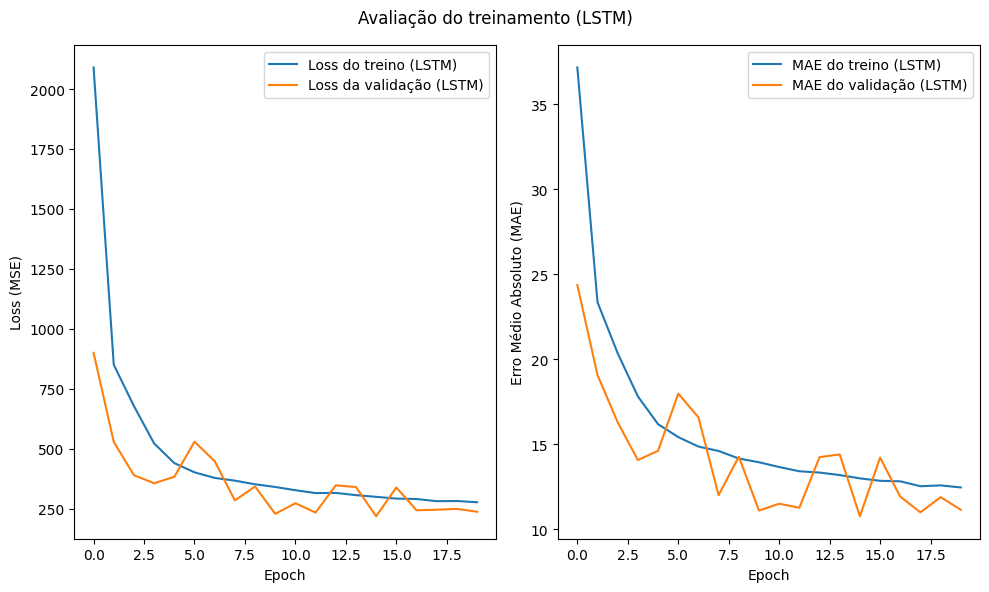

In [280]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('lstm_model.h5', monitor='val_loss')
history_lstm=model_lstm.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint]) 

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Loss do treino (LSTM)')
plt.plot(history_lstm.history['val_loss'], label='Loss da validação (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['mean_absolute_error'], label='MAE do treino (LSTM)')
plt.plot(history_lstm.history['val_mean_absolute_error'], label='MAE do validação (LSTM)')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (LSTM)')
plt.tight_layout()
plt.show()

In [281]:
##Testando o modelo com os dados de teste 

In [282]:
rul_prev = model_lstm.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


In [283]:
##Avaliando o modelo

252.20641920056946
15.88
0.1414623748645132
11.517494451022232
0.7453323934643543
Tempo de 275.460853s


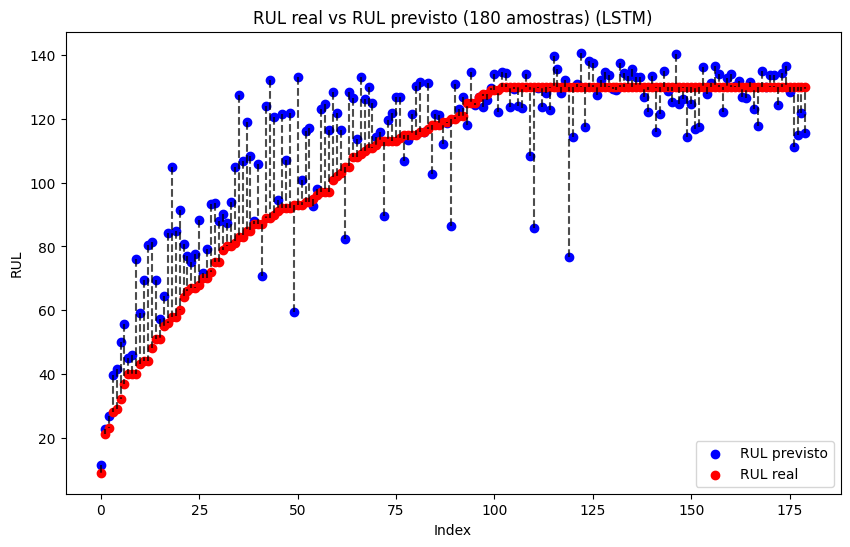

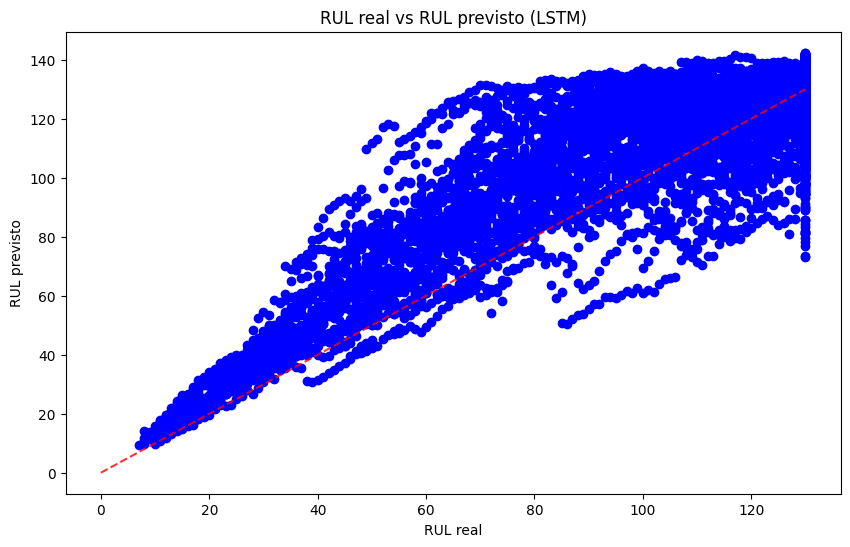

In [284]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start:2f}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (LSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (LSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()

In [285]:
##Criando modelo BiLSTM

In [286]:
model_bi=Sequential()
model_bi.add(Bidirectional(LSTM(64,activation='tanh',input_shape=shape)))
model_bi.add(Dropout(0.5))
model_bi.add(Dense(64,activation='relu'))
model_bi.add(Dense(1,activation='linear'))

model_bi.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [287]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 5586.1885 - mean_absolute_error: 63.2592 - mean_squared_error: 5586.1885

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 3759.8979 - mean_absolute_error: 51.4787 - mean_squared_error: 3759.8979 - val_loss: 1855.6140 - val_mean_absolute_error: 38.4109 - val_mean_squared_error: 1855.6140
Epoch 2/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1585.4690 - mean_absolute_error: 34.8265 - mean_squared_error: 1585.4690

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 1268.1409 - mean_absolute_error: 30.6716 - mean_squared_error: 1268.1409 - val_loss: 724.9036 - val_mean_absolute_error: 23.7981 - val_mean_squared_error: 724.9036
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 876.0446 - mean_absolute_error: 24.6108 - mean_squared_error: 876.0446

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 817.6070 - mean_absolute_error: 23.5076 - mean_squared_error: 817.6070 - val_loss: 549.1127 - val_mean_absolute_error: 18.9254 - val_mean_squared_error: 549.1127
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 708.7087 - mean_absolute_error: 21.0596 - mean_squared_error: 708.7086

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 681.4915 - mean_absolute_error: 20.5969 - mean_squared_error: 681.4915 - val_loss: 525.3747 - val_mean_absolute_error: 18.8511 - val_mean_squared_error: 525.3748
Epoch 5/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 659.6968 - mean_absolute_error: 20.2503 - mean_squared_error: 659.6968

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 640.3837 - mean_absolute_error: 19.8737 - mean_squared_error: 640.3837 - val_loss: 464.5045 - val_mean_absolute_error: 18.2709 - val_mean_squared_error: 464.5045
Epoch 6/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 583.7319 - mean_absolute_error: 19.0451 - mean_squared_error: 583.7319

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 585.4556 - mean_absolute_error: 18.8807 - mean_squared_error: 585.4556 - val_loss: 513.7498 - val_mean_absolute_error: 16.4889 - val_mean_squared_error: 513.7498
Epoch 7/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 554.3698 - mean_absolute_error: 18.3315 - mean_squared_error: 554.3698

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 546.1721 - mean_absolute_error: 18.2090 - mean_squared_error: 546.1721 - val_loss: 478.5528 - val_mean_absolute_error: 17.8356 - val_mean_squared_error: 478.5528
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 545.8313 - mean_absolute_error: 18.1198 - mean_squared_error: 545.8313

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 509.5425 - mean_absolute_error: 17.5405 - mean_squared_error: 509.5425 - val_loss: 543.4879 - val_mean_absolute_error: 17.6405 - val_mean_squared_error: 543.4879
Epoch 9/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 500.3737 - mean_absolute_error: 17.4247 - mean_squared_error: 500.3737

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 480.0704 - mean_absolute_error: 17.0818 - mean_squared_error: 480.0704 - val_loss: 594.2210 - val_mean_absolute_error: 19.2601 - val_mean_squared_error: 594.2210
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 481.4044 - mean_absolute_error: 17.0212 - mean_squared_error: 481.4044

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 457.2129 - mean_absolute_error: 16.5896 - mean_squared_error: 457.2129 - val_loss: 328.1454 - val_mean_absolute_error: 14.3718 - val_mean_squared_error: 328.1454
Epoch 11/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 431.3911 - mean_absolute_error: 16.0969 - mean_squared_error: 431.3911

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 432.6732 - mean_absolute_error: 16.1324 - mean_squared_error: 432.6732 - val_loss: 358.3635 - val_mean_absolute_error: 13.9567 - val_mean_squared_error: 358.3635
Epoch 12/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 421.6875 - mean_absolute_error: 15.9215 - mean_squared_error: 421.6875

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 414.8677 - mean_absolute_error: 15.7443 - mean_squared_error: 414.8677 - val_loss: 383.9920 - val_mean_absolute_error: 15.3912 - val_mean_squared_error: 383.9920
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 400.3981 - mean_absolute_error: 15.4535 - mean_squared_error: 400.3981

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 394.4662 - mean_absolute_error: 15.3336 - mean_squared_error: 394.4662 - val_loss: 330.9099 - val_mean_absolute_error: 13.7136 - val_mean_squared_error: 330.9099
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 399.4043 - mean_absolute_error: 15.3710 - mean_squared_error: 399.4043

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 396.5500 - mean_absolute_error: 15.3607 - mean_squared_error: 396.5500 - val_loss: 290.3314 - val_mean_absolute_error: 12.6657 - val_mean_squared_error: 290.3314
Epoch 15/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 377.6378 - mean_absolute_error: 14.9990 - mean_squared_error: 377.6378

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 373.4712 - mean_absolute_error: 14.8919 - mean_squared_error: 373.4712 - val_loss: 242.7594 - val_mean_absolute_error: 11.7999 - val_mean_squared_error: 242.7594
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 366.7936 - mean_absolute_error: 14.7738 - mean_squared_error: 366.7936

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 368.8934 - mean_absolute_error: 14.7810 - mean_squared_error: 368.8934 - val_loss: 319.6201 - val_mean_absolute_error: 13.6912 - val_mean_squared_error: 319.6201
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 368.2392 - mean_absolute_error: 14.7616 - mean_squared_error: 368.2392

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 370.5519 - mean_absolute_error: 14.8200 - mean_squared_error: 370.5519 - val_loss: 292.7860 - val_mean_absolute_error: 13.1433 - val_mean_squared_error: 292.7860
Epoch 18/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 353.1292 - mean_absolute_error: 14.4613 - mean_squared_error: 353.1292

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 353.9284 - mean_absolute_error: 14.4916 - mean_squared_error: 353.9284 - val_loss: 344.1508 - val_mean_absolute_error: 13.1995 - val_mean_squared_error: 344.1508
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 349.2464 - mean_absolute_error: 14.4412 - mean_squared_error: 349.2464

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 344.5836 - mean_absolute_error: 14.3386 - mean_squared_error: 344.5836 - val_loss: 319.3969 - val_mean_absolute_error: 12.8052 - val_mean_squared_error: 319.3969
Epoch 20/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 342.6095 - mean_absolute_error: 14.1757 - mean_squared_error: 342.6095

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 345.2268 - mean_absolute_error: 14.2249 - mean_squared_error: 345.2269 - val_loss: 242.5918 - val_mean_absolute_error: 11.8178 - val_mean_squared_error: 242.5918
Epoch 21/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 328.3659 - mean_absolute_error: 13.8989 - mean_squared_error: 328.3659

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 336.1272 - mean_absolute_error: 14.1007 - mean_squared_error: 336.1272 - val_loss: 234.5895 - val_mean_absolute_error: 11.3818 - val_mean_squared_error: 234.5895
Epoch 22/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 338.6331 - mean_absolute_error: 13.9827 - mean_squared_error: 338.6331

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 333.1389 - mean_absolute_error: 13.9255 - mean_squared_error: 333.1389 - val_loss: 250.6290 - val_mean_absolute_error: 12.2426 - val_mean_squared_error: 250.6290
Epoch 23/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 326.3313 - mean_absolute_error: 13.8046 - mean_squared_error: 326.3314

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 325.1288 - mean_absolute_error: 13.8122 - mean_squared_error: 325.1288 - val_loss: 283.9502 - val_mean_absolute_error: 12.2967 - val_mean_squared_error: 283.9502
Epoch 24/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 321.2362 - mean_absolute_error: 13.7095 - mean_squared_error: 321.2362

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 324.6592 - mean_absolute_error: 13.7441 - mean_squared_error: 324.6592 - val_loss: 210.7506 - val_mean_absolute_error: 10.6892 - val_mean_squared_error: 210.7506
Epoch 25/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 320.9985 - mean_absolute_error: 13.6472 - mean_squared_error: 320.9985

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 322.3998 - mean_absolute_error: 13.6651 - mean_squared_error: 322.3998 - val_loss: 282.2987 - val_mean_absolute_error: 13.1616 - val_mean_squared_error: 282.2987
Epoch 26/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 323.1272 - mean_absolute_error: 13.7658 - mean_squared_error: 323.1272

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 323.0584 - mean_absolute_error: 13.7562 - mean_squared_error: 323.0584 - val_loss: 209.5446 - val_mean_absolute_error: 10.6912 - val_mean_squared_error: 209.5446
Epoch 27/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 310.6746 - mean_absolute_error: 13.4223 - mean_squared_error: 310.6746

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 307.4587 - mean_absolute_error: 13.3693 - mean_squared_error: 307.4587 - val_loss: 207.4885 - val_mean_absolute_error: 10.6468 - val_mean_squared_error: 207.4885
Epoch 28/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 311.3387 - mean_absolute_error: 13.4692 - mean_squared_error: 311.3387

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 307.4407 - mean_absolute_error: 13.3550 - mean_squared_error: 307.4407 - val_loss: 278.2762 - val_mean_absolute_error: 12.0308 - val_mean_squared_error: 278.2762
Epoch 29/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 313.3212 - mean_absolute_error: 13.4917 - mean_squared_error: 313.3212

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 313.3738 - mean_absolute_error: 13.4035 - mean_squared_error: 313.3738 - val_loss: 241.0639 - val_mean_absolute_error: 10.8587 - val_mean_squared_error: 241.0639
Epoch 30/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 294.5591 - mean_absolute_error: 13.0345 - mean_squared_error: 294.5591

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 294.1246 - mean_absolute_error: 13.1042 - mean_squared_error: 294.1246 - val_loss: 214.3831 - val_mean_absolute_error: 10.4738 - val_mean_squared_error: 214.3831


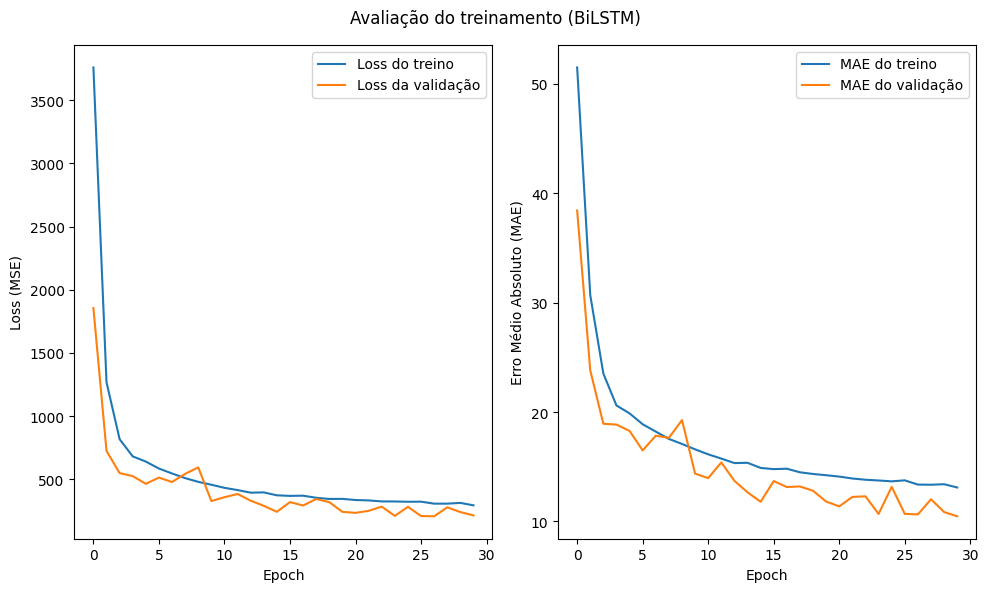

In [288]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('bi_model.h5', monitor='val_loss')
history_bi=model_bi.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bi.history['loss'], label='Loss do treino')
plt.plot(history_bi.history['val_loss'], label='Loss da validação')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_bi.history['mean_absolute_error'], label='MAE do treino')
plt.plot(history_bi.history['val_mean_absolute_error'], label='MAE do validação')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (BiLSTM)')
plt.tight_layout()
plt.show()

In [289]:
##Testando o modelo com os dados de teste

In [290]:
rul_prev = model_bi.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [291]:
##Avaliando o modelo

232.0279376093917
15.23
0.1306667044182733
11.139837669830502
0.765707789247846
Tempo de 112.002612s


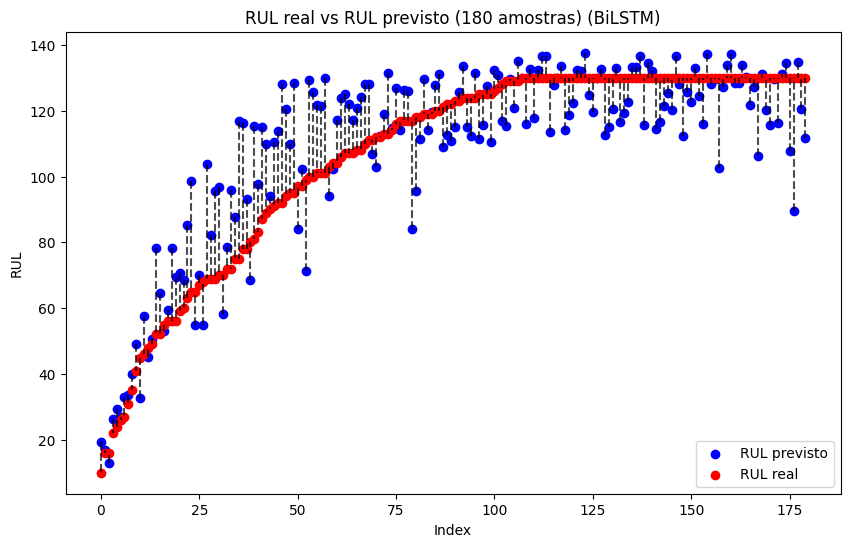

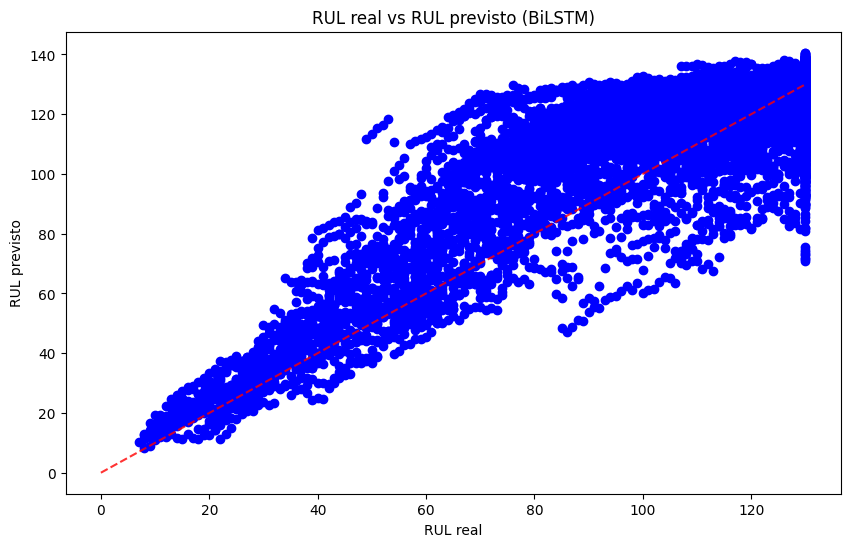

In [292]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start:2f}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (BiLSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (BiLSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()